In [75]:
import pandas as pd
import ast 
import matplotlib.pyplot as plt
import json
import numpy as np
#Python 3.7.4

In [226]:
df = pd.read_parquet('export/part-00001-4bc5c283-7980-4826-9d55-308b6f0af6ca-c000.zstd.parquet')

In [227]:
# Process data
df = df.sort_values(by=['timestamp'])

In [228]:
df_data = df[df['category_sub'].isin(['step', 'skill-training','skill-training-cycle'])]
#filter df with composabl_obs on "data" col only
df_data = df_data[(df_data['data'].str.contains('composabl_obs')) | (df_data['category_sub'].str.contains('skill-training')) | (df_data['category_sub'].str.contains('skill-training-cycle'))]

#df_data['data'] = df_data['data'].apply(lambda x: x if 'composabl_obs' in x else None)
def convert_to_dict(x):
    try:
        return json.loads(x)
    except:
        try:
            return ast.literal_eval(x)
        except:
            return None

df_data['data'] = df_data['data'].apply(lambda x: convert_to_dict(x))

df_data['skill_name'] = df_data['data'].apply(lambda x: x['name'] if 'is_done' in x else None)
df_data['skill_name'] = df_data['skill_name'].fillna(method='bfill')

df_data['reward'] = df_data['data'].apply(lambda x: x['teacher_reward'] if 'composabl_obs' in x else None)

df_data['obs'] = df_data['data'].apply(lambda x: x['composabl_obs'] if 'composabl_obs' in x else None)

#df_data['done'] = df_data['data'].apply(lambda x: x["teacher_terminated"] if "teacher_terminated" in x else None)
df_data['cycle'] = df_data['data'].apply(lambda x: x['cycle'] if 'cycle' in x else None)
df_data['cycle'] = df_data['cycle'].fillna(method='bfill')

df_data = df_data[df_data['category_sub'] == 'step']

df_data

,timestamp,run_id,source,category,category_sub,data,skill_name,reward,obs,cycle
20034,2024-08-12 16:37:55.075,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [8.585198402404785], ...",skill-fecxlzo,0.000000,"{'Ca': [8.585198402404785], 'Cb_Prod': [0.0], ...",0.0
20040,2024-08-12 16:37:55.075,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [8.585198402404785], ...",skill-fecxlzo,0.000000,"{'Ca': [8.585198402404785], 'Cb_Prod': [0.0], ...",0.0
20043,2024-08-12 16:37:55.075,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [8.585198402404785], ...",skill-fecxlzo,0.000000,"{'Ca': [8.585198402404785], 'Cb_Prod': [0.0], ...",0.0
20037,2024-08-12 16:37:55.075,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [8.585198402404785], ...",skill-fecxlzo,0.000000,"{'Ca': [8.585198402404785], 'Cb_Prod': [0.0], ...",0.0
20031,2024-08-12 16:37:55.075,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [8.585198402404785], ...",skill-fecxlzo,0.000000,"{'Ca': [8.585198402404785], 'Cb_Prod': [0.0], ...",0.0
...,...,...,...,...,...,...,...,...,...,...
562306,2024-08-12 16:48:41.672,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [0.9113372564315796],...",selector-y6eqf4w,0.991770,"{'Ca': [0.9113372564315796], 'Cb_Prod': [0.0],...",9.0
562294,2024-08-12 16:48:41.672,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [0.9194542765617372],...",selector-y6eqf4w,0.991892,"{'Ca': [0.9194542765617372], 'Cb_Prod': [0.0],...",9.0
562302,2024-08-12 16:48:41.672,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [0.8894502520561218],...",selector-y6eqf4w,0.991435,"{'Ca': [0.8894502520561218], 'Cb_Prod': [0.0],...",9.0
562298,2024-08-12 16:48:41.672,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [0.9209903478622437],...",selector-y6eqf4w,0.991915,"{'Ca': [0.9209903478622437], 'Cb_Prod': [0.0],...",9.0


In [230]:
# group by runs
df_group = df_data.groupby(['run_id','skill_name','cycle'])['reward'].mean()

# Process observation data
df_obs = pd.DataFrame(data=[[v[0] for v in list(x.values())] for x in df_data['obs'].values], columns=[list(df_data['obs'][0].keys())])
#df_obs['episode'] = df_data['episodes']
df_obs['cycle'] = df_data['cycle']
df_obs['run_id'] = df_data['run_id']
df_obs['skill_name'] = df_data['skill_name']
df_obs.columns = [x[0] for x in list(df_obs.columns)]

# Training Metrics

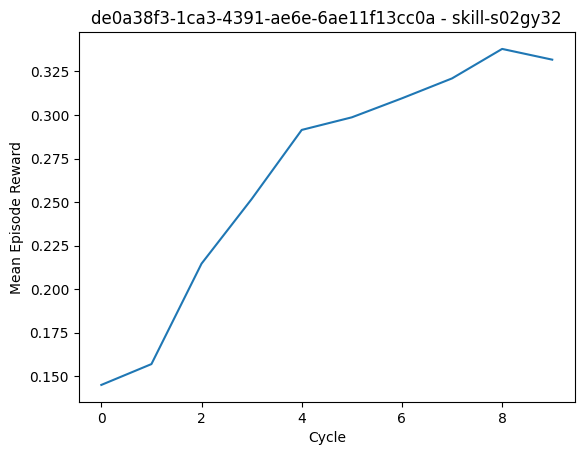

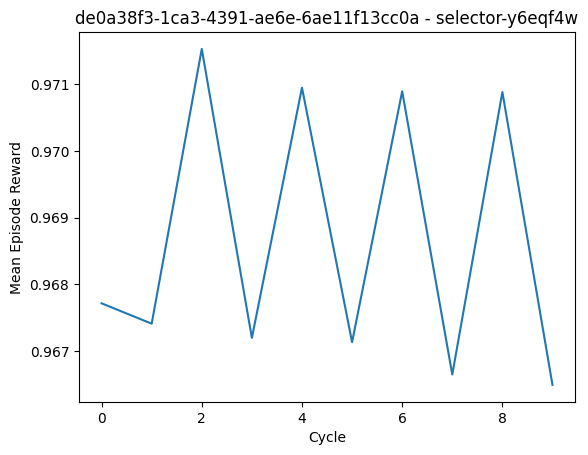

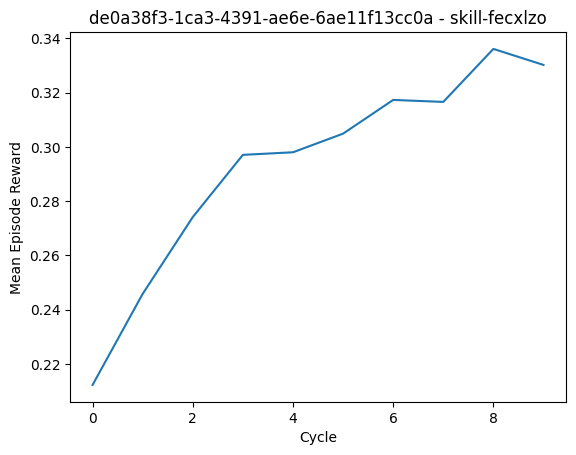

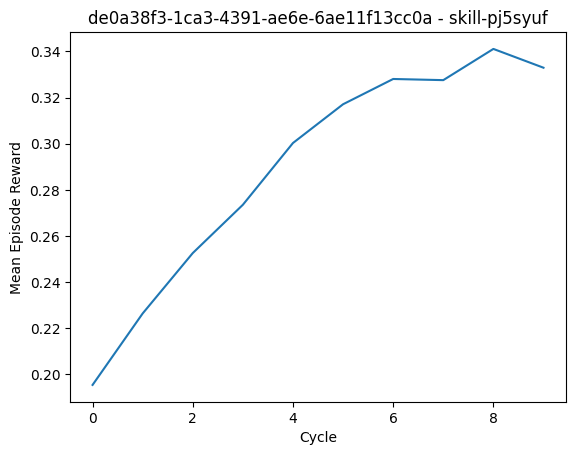

In [231]:
# Episode Reward by Run Id
for run_id in list(set([x[0] for x in df_group.index])):
    for skill in list(set([x[1] for x in df_group.index])):
        #df_group[run_id].plot(subplots=True, title=run_id)
        plt.plot(df_group[run_id][skill])
        plt.ylabel(f'Mean Episode Reward')
        plt.xlabel(f'Cycle')
        plt.title(f'{run_id} - {skill}')

        plt.show()

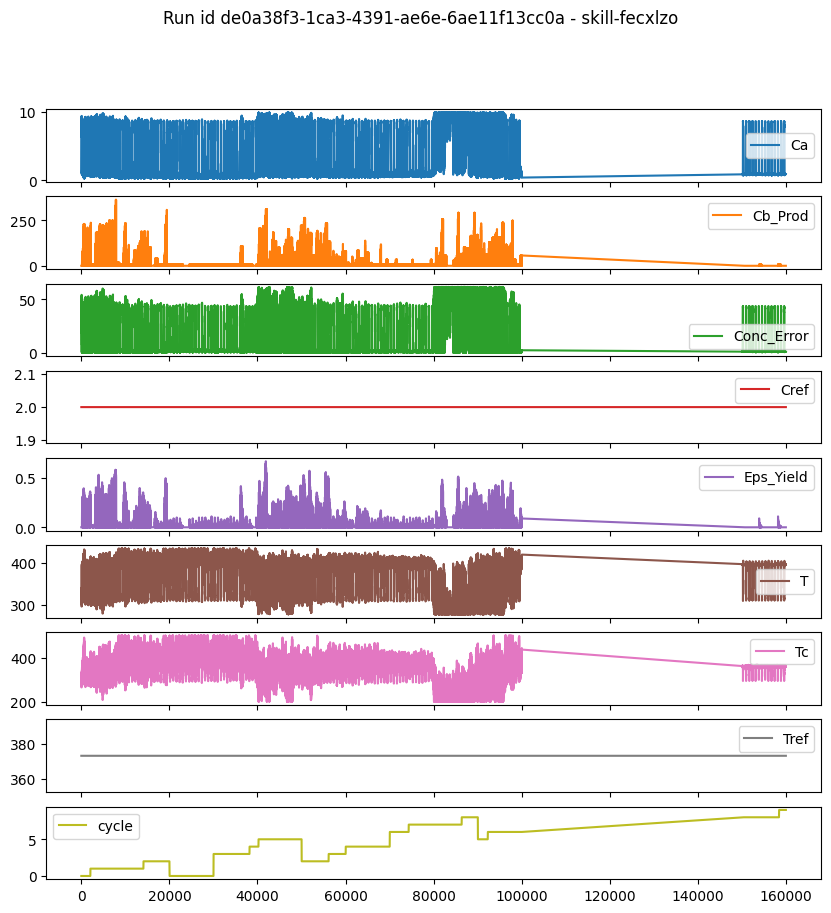

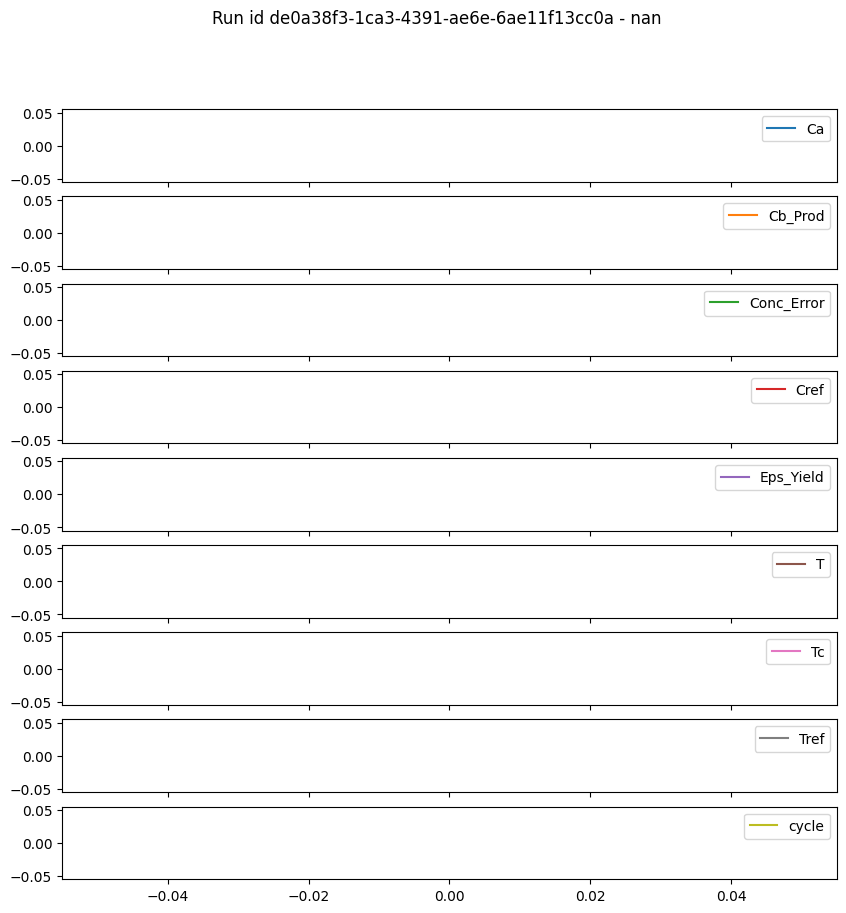

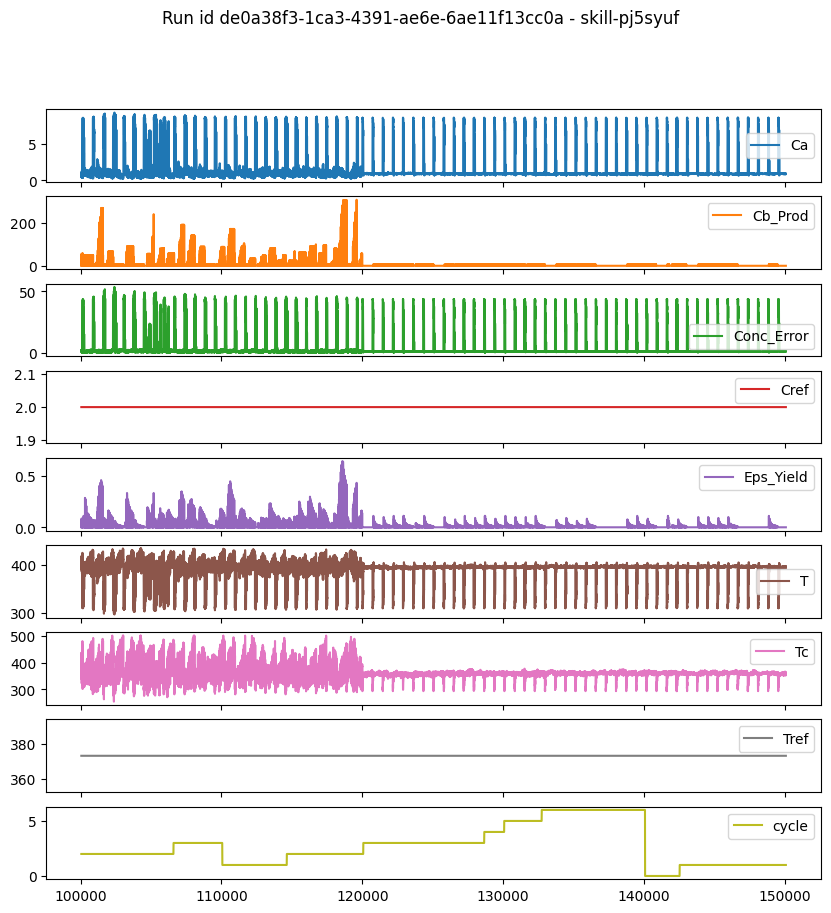

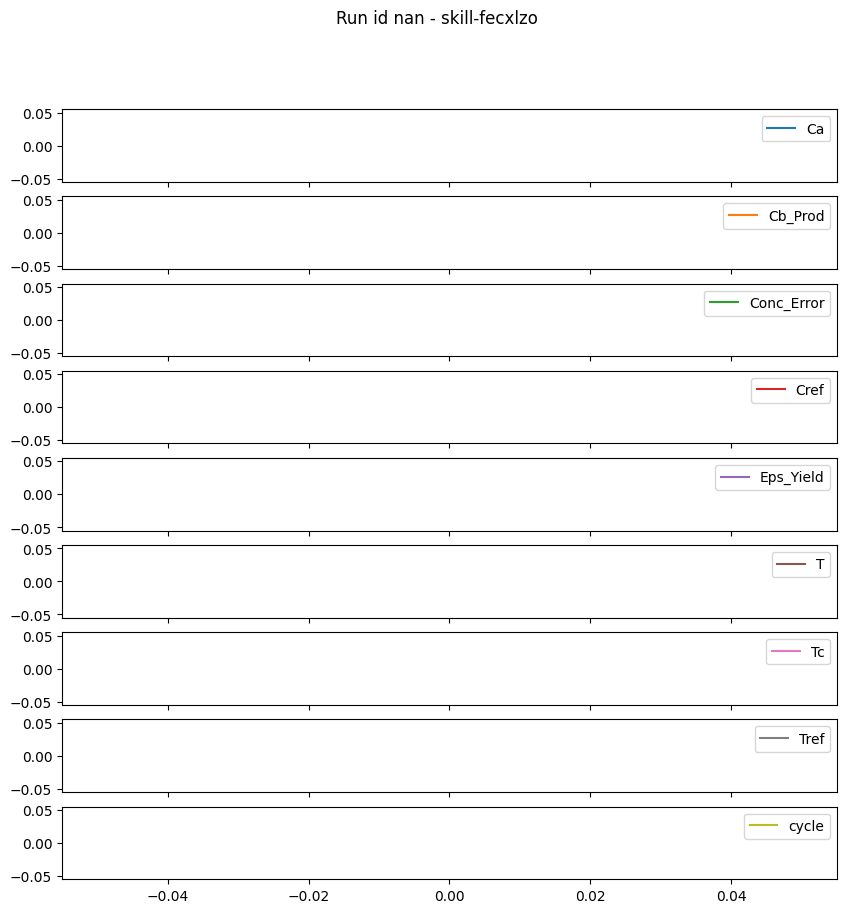

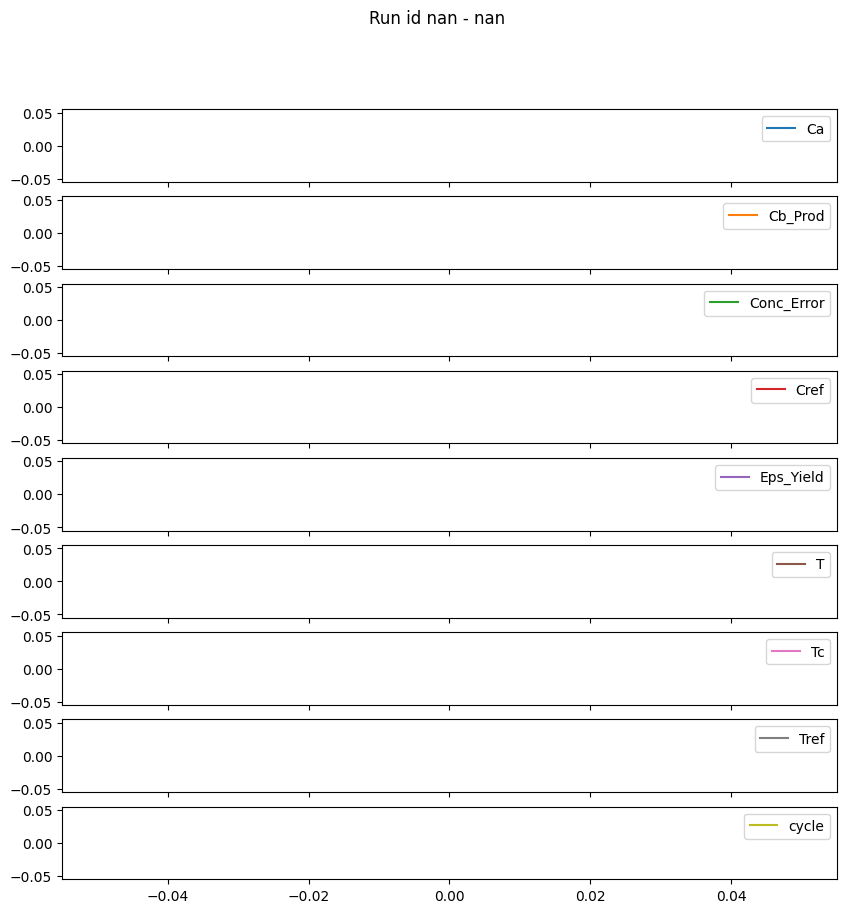

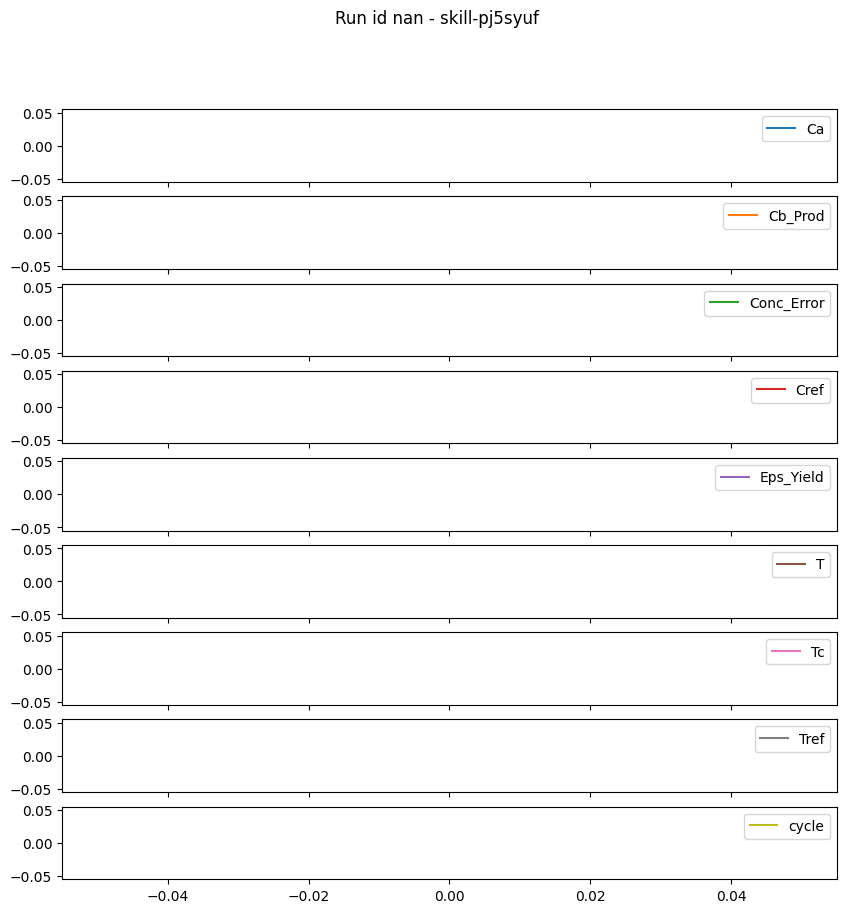

In [232]:
# Plot Observation data by run_ids
for run in df_obs.run_id.unique():
    for skill in df_obs.skill_name.unique():
        df_obs[(df_obs['run_id'] == run) & (df_obs['skill_name'] == skill)].plot(subplots=True, figsize=(10,10), title=f"Run id {run} - {skill}")

# Analyze a single Run and Skill

In [233]:
print(f"Run ids: {list(df_data['run_id'].unique())} ")

Run ids: ['de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a'] 


In [234]:
# Choose a run id
run_id = 'de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a'

In [235]:
print(f"Skills : {list(df_data[df_data['run_id'] == run_id]['skill_name'].unique())} ")

Skills : ['skill-fecxlzo', 'skill-pj5syuf', 'skill-s02gy32', 'selector-y6eqf4w'] 


In [236]:
# Choose a skill
skill_name = 'skill-fecxlzo'

In [237]:
print(f"Cycles : {list(df_data[(df_data['run_id'] == run_id) & (df_data['skill_name'] == skill_name)]['cycle'].unique())} ")

Cycles : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0] 


In [238]:
# Choose a cycle
cycle = 9

In [239]:
# Filter dataframe by run if
df_filter = df_data[(df_data['run_id'] == run_id) & (df_data['skill_name'] == skill_name) & (df_data['cycle'] == cycle)]

In [240]:
df_filter

,timestamp,run_id,source,category,category_sub,data,skill_name,reward,obs,cycle
158444,2024-08-12 16:39:11.935,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [8.585198402404785], ...",skill-fecxlzo,0.000000,"{'Ca': [8.585198402404785], 'Cb_Prod': [0.0], ...",9.0
158447,2024-08-12 16:39:11.935,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [8.585198402404785], ...",skill-fecxlzo,0.000000,"{'Ca': [8.585198402404785], 'Cb_Prod': [0.0], ...",9.0
158450,2024-08-12 16:39:11.935,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [8.585198402404785], ...",skill-fecxlzo,0.000000,"{'Ca': [8.585198402404785], 'Cb_Prod': [0.0], ...",9.0
158459,2024-08-12 16:39:11.936,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [8.585198402404785], ...",skill-fecxlzo,0.000000,"{'Ca': [8.585198402404785], 'Cb_Prod': [0.0], ...",9.0
158456,2024-08-12 16:39:11.936,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [8.585198402404785], ...",skill-fecxlzo,0.000000,"{'Ca': [8.585198402404785], 'Cb_Prod': [0.0], ...",9.0
...,...,...,...,...,...,...,...,...,...,...
160414,2024-08-12 16:39:15.419,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [0.4400604665279389],...",skill-fecxlzo,0.366423,"{'Ca': [0.4400604665279389], 'Cb_Prod': [0.0],...",9.0
160411,2024-08-12 16:39:15.419,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [0.6274727582931519],...",skill-fecxlzo,0.311287,"{'Ca': [0.6274727582931519], 'Cb_Prod': [0.0],...",9.0
160402,2024-08-12 16:39:15.419,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [0.612810492515564], ...",skill-fecxlzo,0.373328,"{'Ca': [0.612810492515564], 'Cb_Prod': [0.0], ...",9.0
160405,2024-08-12 16:39:15.419,de0a38f3-1ca3-4391-ae6e-6ae11f13cc0a,sdk-rollout-worker-env-composabl,base-skill-env,step,"{'composabl_obs': {'Ca': [0.3084833025932312],...",skill-fecxlzo,0.337270,"{'Ca': [0.3084833025932312], 'Cb_Prod': [0.0],...",9.0


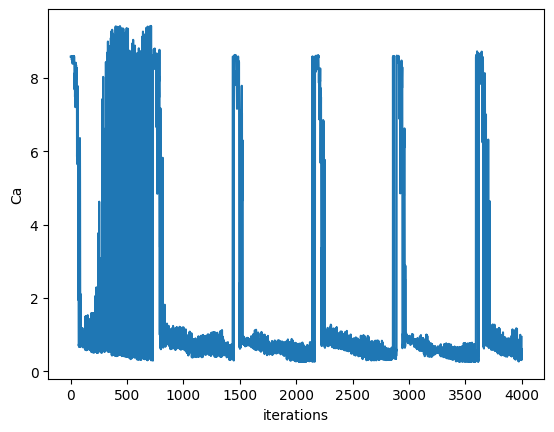

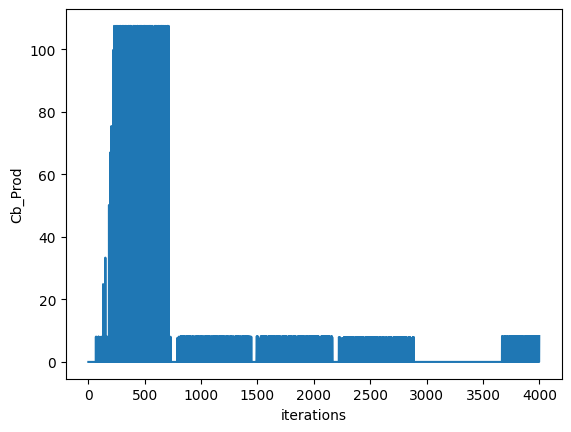

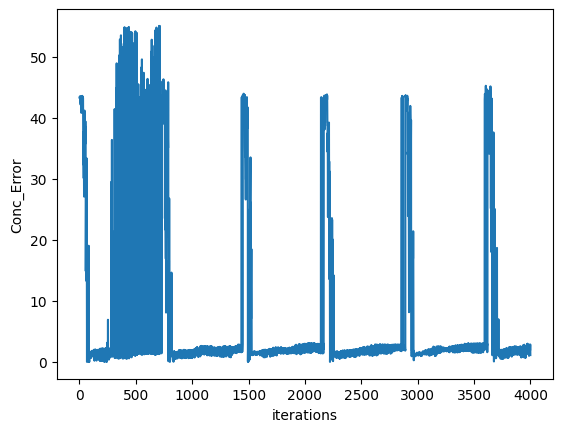

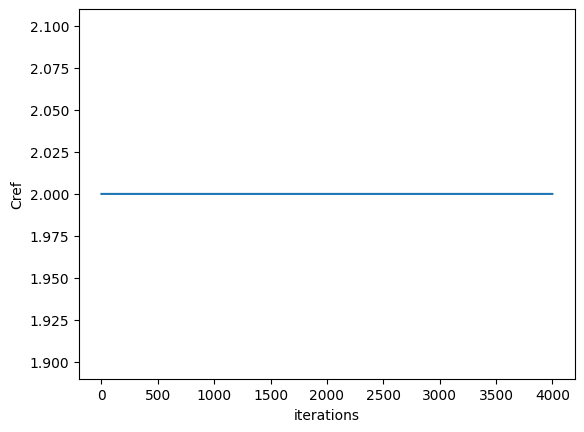

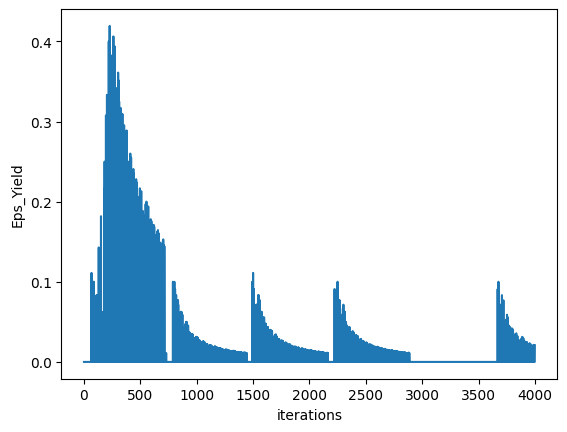

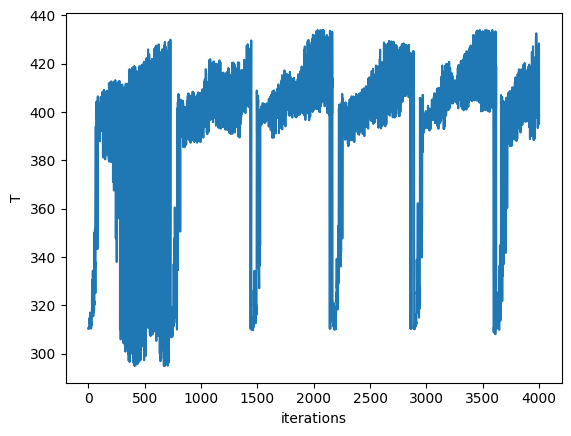

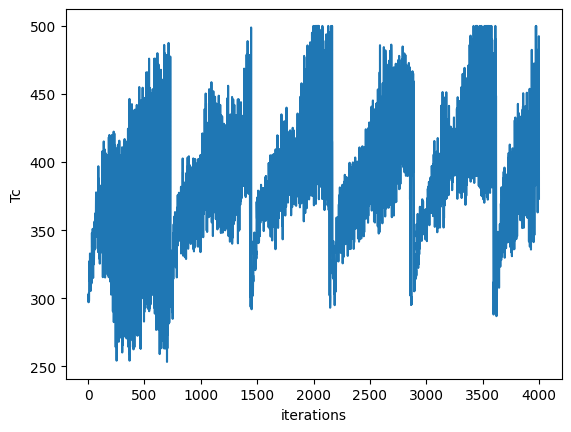

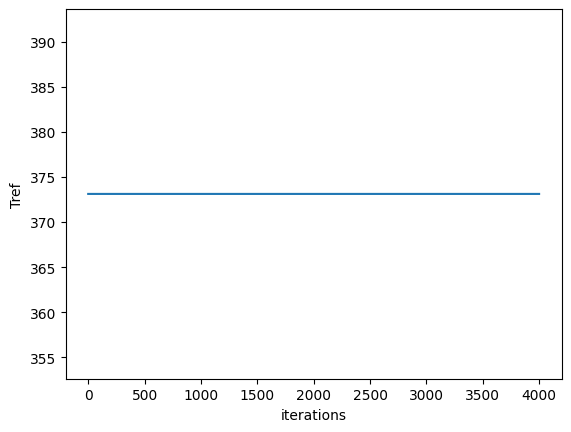

In [241]:
# Analyze how each variable is doing compared to their targets
target = 0
for v in list(df_filter['obs'].iloc[0].keys()):
    plt.plot(df_filter['obs'].reset_index(drop=True).apply(lambda x: x[v][0]))
    plt.xlabel('iterations')
    plt.ylabel(v)
    plt.show()